In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name 'get_backend'

# 画像の読み込み

In [63]:
back = cv2.imread("gausu_rect0963.png")
back = cv2.cvtColor(back, cv2.COLOR_BGR2RGB)
target = cv2.imread("point_pro_image0963.png")
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

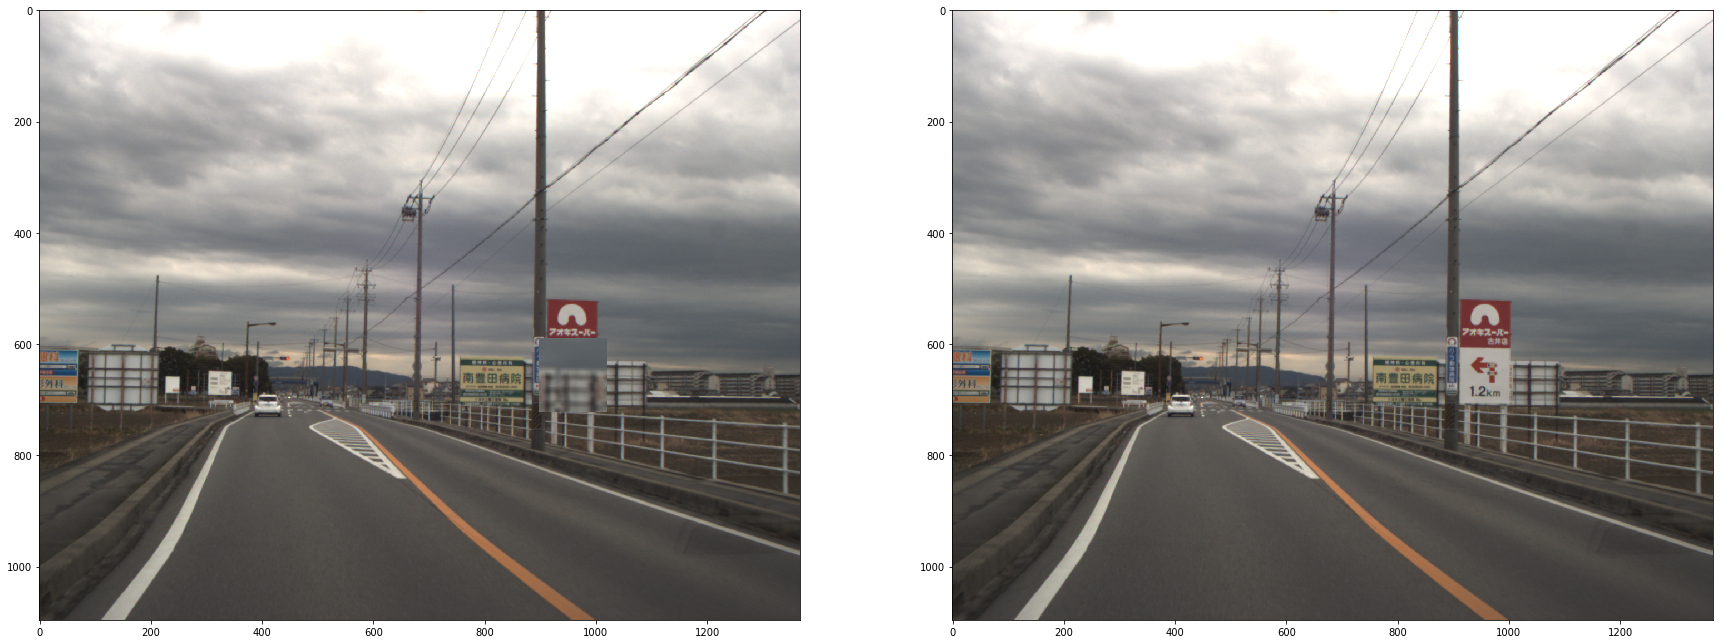

In [65]:
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.imshow(back, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(target, cmap='gray')

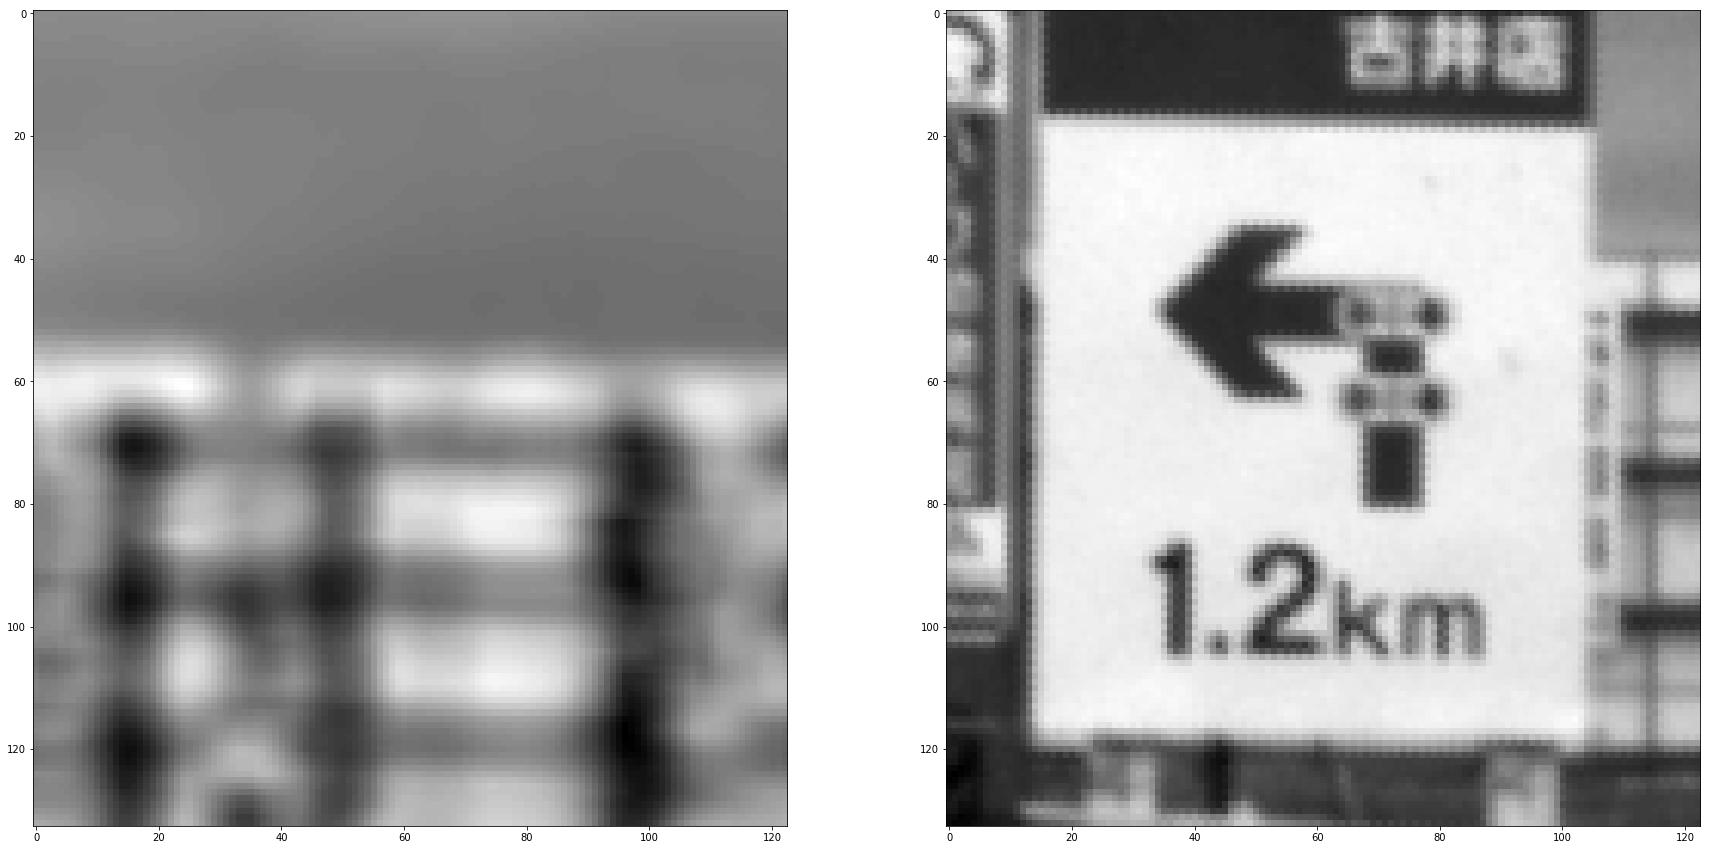

In [71]:
margin = 0
x1, y1 = 898, 589
x2, y2 = 1021, 722
back_clip = back[y1-margin:y2+margin,x1-margin:x2 + margin].copy()
back_clip = cv2.cvtColor(back_clip, cv2.COLOR_BGR2GRAY)
target_clip = target[589-margin:722+margin,898-margin:1021+margin].copy()
target_clip = cv2.cvtColor(target_clip, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(30, 15))
plt.subplot(1, 2, 1)
plt.imshow(back_clip, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(target_clip, cmap='gray')

# Cannyエッジ抽出

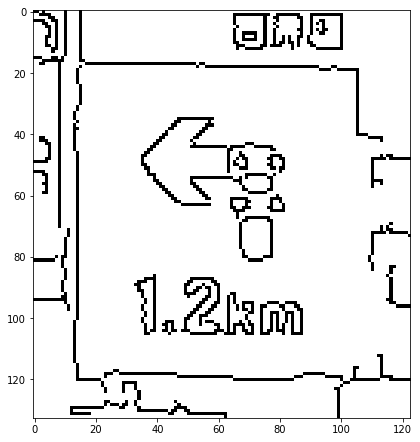

In [95]:
edge = cv2.Canny(target_clip, 100, 200)
edge = np.uint8((255 - edge)/255.0)
plt.figure(figsize=(15, 7.5))
plt.imshow(edge, cmap='gray', vmin=0, vmax=1)

# Distance Transform

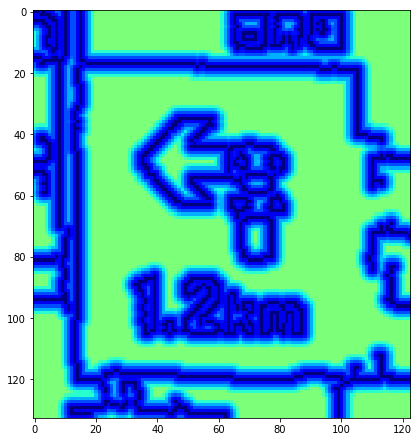

In [99]:
n_dist = 5
dist = cv2.distanceTransform(edge, cv2.DIST_L2, 5)
dist = np.clip(dist, 0, n_dist)
plt.figure(figsize=(15, 7.5))
plt.imshow(dist, cmap='jet', vmin=0, vmax=10)

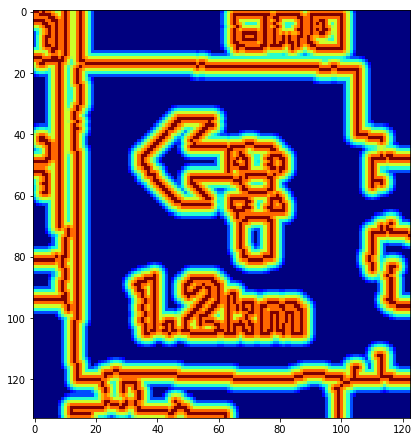

In [100]:
h,w = target.shape[0:2]
alpha = np.ones((h, w), "float32")
alpha = 1.0 - dist/n_dist
plt.figure(figsize=(15, 7.5))
plt.imshow(alpha, cmap="jet", vmin=0, vmax=1)

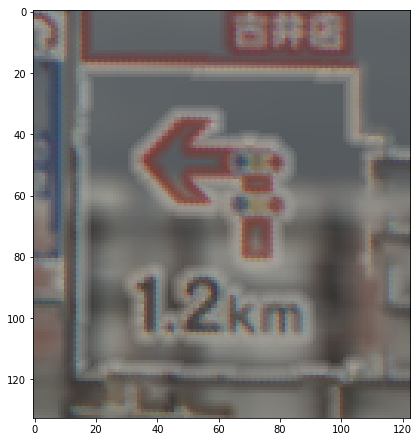

In [101]:
aug = np.zeros((y2-y1, x2-x1, 3), np.uint8)
aug[:,:,0] = alpha*target[y1:y2,x1:x2,0] + (1.0 - alpha)*back[y1:y2,x1:x2,0]
aug[:,:,1] = alpha*target[y1:y2,x1:x2,1] + (1.0 - alpha)*back[y1:y2,x1:x2,1]
aug[:,:,2] = alpha*target[y1:y2,x1:x2,2] + (1.0 - alpha)*back[y1:y2,x1:x2,2]
plt.figure(figsize=(15, 7.5))
plt.imshow(aug)

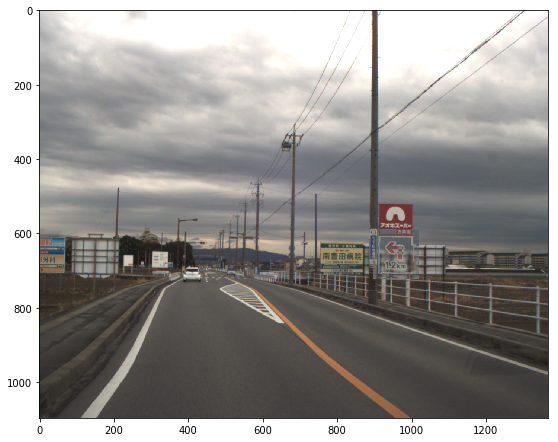

In [103]:
back[y1:y2,x1:x2] = aug
plt.figure(figsize=(15, 7.5))
plt.imshow(back)